In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


625/625 [==============================] - 924s 1s/step - loss: 1.3865 - accuracy: 0.6046 - val_loss: 0.6014 - val_accuracy: 0.6892
Epoch 2/10
625/625 [==============================] - 703s 1s/step - loss: 0.5618 - accuracy: 0.7110 - val_loss: 0.5199 - val_accuracy: 0.7438
Epoch 3/10
625/625 [==============================] - 652s 1s/step - loss: 0.5253 - accuracy: 0.7487 - val_loss: 1.3764 - val_accuracy: 0.6062
Epoch 4/10
625/625 [==============================] - 651s 1s/step - loss: 0.4634 - accuracy: 0.7810 - val_loss: 0.5256 - val_accuracy: 0.7176
Epoch 5/10
625/625 [==============================] - 654s 1s/step - loss: 0.3807 - accuracy: 0.8279 - val_loss: 0.4390 - val_accuracy: 0.7940
Epoch 6/10
625/625 [==============================] - 653s 1s/step - loss: 0.3080 - accuracy: 0.8665 - val_loss: 0.5576 - val_accuracy: 0.7606
Epoch 7/10
625/625 [==============================] - 650s 1s/step - loss: 0.2291 - accuracy: 0.9045 - val_loss: 0.6353 - val_accuracy: 0.76

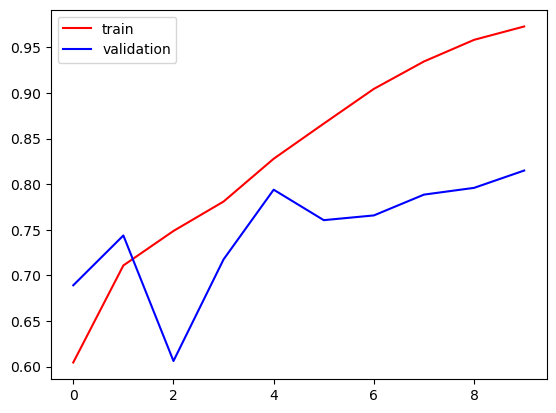

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

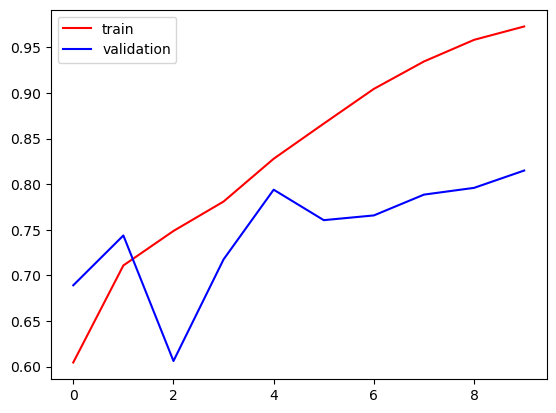

In [10]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

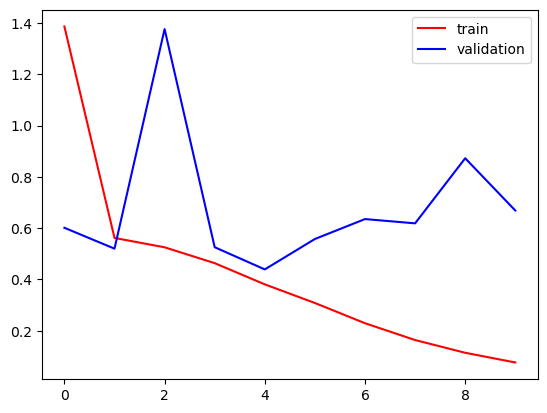

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

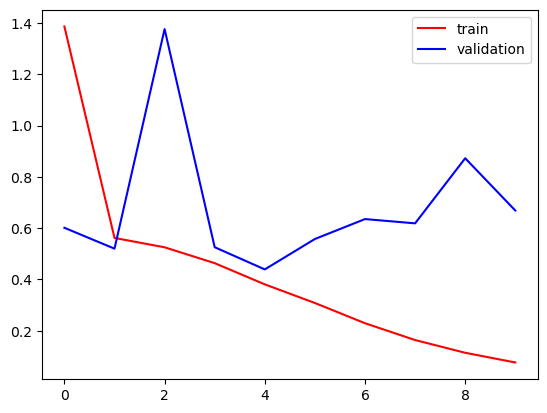

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 325.1 kB/s eta 0:01:59
   ---------------------------------------- 0.1/38.6 MB 469.7 kB/s eta 0:01:23
   ---------------------------------------- 0.1/38.6 MB 787.7 kB/s eta 0:00:49
   ---------------------------------------- 0.2/38.6 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.3/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.5/38.6 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.6/38.6 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.8/38.6 MB 2.0 MB/s eta 0:00:20
    -------------

In [17]:
import cv2

In [23]:
test_img = cv2.imread('dog.jpg')

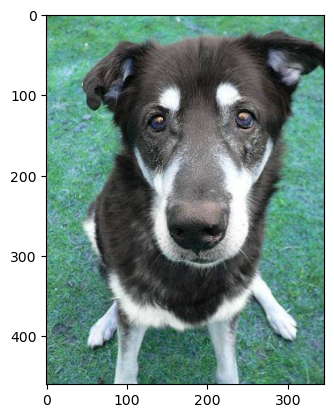

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(460, 346, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_input = test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 0s 446ms/step


array([[1.]], dtype=float32)